In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading data from dataset
DATASET_PATH_NAME = 'question2/q2-train-features.csv'
dataset = pd.read_csv(DATASET_PATH_NAME)
outcomes = dataset['Price'].to_numpy()
since_nov_2014 = dataset['Months Past Since November 2014'].to_numpy()
CPI = dataset['CPI'].to_numpy()
unemployment_rate = dataset['Unemployment Rate'].to_numpy()

Model A:

In [3]:
def get_x_matrix_model_a(data, y):
    x = np.zeros((y.shape[0],2))
    for idx in range(y.shape[0]):
        x[idx] = [1, data[idx]] # 1 for x_0
    return x

In [4]:
def compute_optimal_weights(x,y): # x is the feature matrix, y is the outcome vector
    x_t_x = np.dot(np.transpose(x), x) # (x transpose) dot (x)
    inv = np.linalg.inv(x_t_x)
    beta_1 = np.dot(inv, ©np.transpose(x))
    return np.dot(beta_1, y)

In [5]:
def evaluate_model_A(data, weights):
    predictions = []
    for idx in range(data.shape[0]):
        predictions.append(weights[0] + weights[1] * data[idx])
    return predictions

In [6]:
def model_plot(data, predictions, y, name):
    plt.scatter(data, y, label='Original Data', c='red')
    plt.plot(data, predictions, label='Predictions')
    plt.xlabel('Months Past Since November 2014')
    plt.ylabel('USD/TRY excahnge rate')
    plt.title('Model ' + name + ': USD/TRY exchange rate predictions')
    plt.legend()
    plt.show()

In [7]:
def get_MSE(predictions, outcomes):
    mse = 0
    for idx in range(len(predictions)):
        mse += ((outcomes[idx] - predictions[idx])**2)
    return mse / (len(predictions))

In [8]:
def model_A_flow(data, y):
    x = get_x_matrix_model_a(data, y)
    w = compute_optimal_weights(x, y)
    print('Weight 0: ' + str(w[0]))
    print('Weight 1: ' + str(w[1]))
    pred = evaluate_model_A(data, w)
    mse = get_MSE(pred, y)
    print('MSE for model A: ' + str(mse))
    model_plot(data, pred, y, 'A')

Weight 0: 2.002371537112798
Weight 1: 0.0634281614322188
MSE for model A: 0.1878714027639879


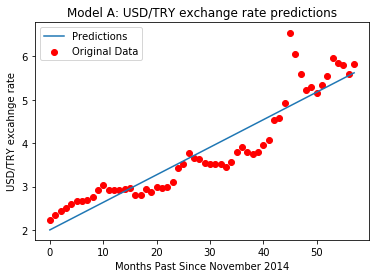

In [9]:
model_A_flow(since_nov_2014, outcomes)

Model B:

In [10]:
def get_x_matrix_model_b(col1, col2, y):
    x = np.zeros((y.shape[0], 3))
    for idx in range(y.shape[0]):
        x[idx] = [1, col1[idx], col2[idx]] # 1 for x_0
    return x

In [11]:
def evaluate_model_B(col1, col2, weights):
    predictions = []
    for idx in range(col1.shape[0]):
        predictions.append(weights[0] + weights[1] * col1[idx] + weights[2] * col2[idx])
    return predictions

In [12]:
def model_B_flow(col1, col2, y):
    x = get_x_matrix_model_b(col1, col2, y)
    w = compute_optimal_weights(x, y)
    print('Weight 0: ' + str(w[0]))
    print('Weight 1: ' + str(w[1]))
    print('Weight 2: ' + str(w[2]))
    pred = evaluate_model_B(col1, col2, w)
    mse = get_MSE(pred, y)
    print('MSE for Model B: ' + str(mse))
    model_plot(col1, pred, y, 'B')

Weight 0: -3.2841654813776393
Weight 1: -0.010325747619400985
Weight 2: 0.02338648171824541
MSE for Model B: 0.0891442586694583


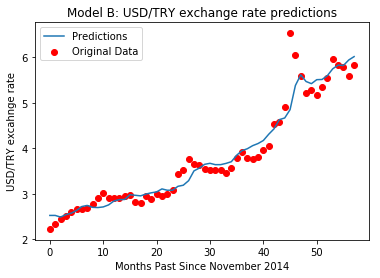

In [13]:
model_B_flow(since_nov_2014, CPI, outcomes)

In [14]:
def get_x_matrix_model_c(col1, col2, col3, y):
    x = np.zeros((y.shape[0], 4))
    for idx in range(y.shape[0]):
        x[idx] = [1, col1[idx], col2[idx], col3[idx]] # 1 for x_0
    return x

In [15]:
def evaluate_model_C(col1, col2, col3, weights):
    predictions = []
    for idx in range(col1.shape[0]):
        predictions.append(weights[0] + weights[1] * col1[idx] + weights[2] * col2[idx] + weights[3] * col3[idx])
    return predictions

In [16]:
def model_C_flow(col1, col2, col3, y):
    x = get_x_matrix_model_c(col1, col2, col3, y)
    w = compute_optimal_weights(x, y)
    for idx in range(len(w)):
        print('Weight ' + str(idx) +': ' + str(w[idx]))
    pred = evaluate_model_C(col1, col2, col3, w)
    mse = get_MSE(pred, y)
    print('MSE for Model C: ' + str(mse))
    model_plot(col1, pred, y, 'C')

Weight 0: -3.2900591745731824
Weight 1: -0.01018874946956318
Weight 2: 0.02329301157162092
Weight 3: 0.0015308366268742962
MSE for Model C: 0.08913535296420344


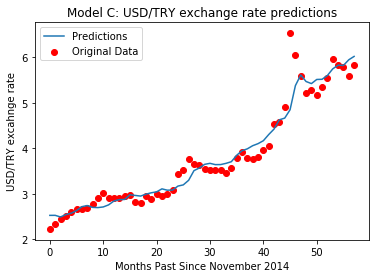

In [17]:
model_C_flow(since_nov_2014, CPI, unemployment_rate, outcomes)

Testing Models A, B and C:

In [18]:
test_set = dataset.iloc[-3:]
training_set = dataset.iloc[0:-3]

In [19]:
def evaluate_models(train, test):
    # Training data
    col1_train = training_set['Months Past Since November 2014'].to_numpy()
    col2_train = training_set['CPI'].to_numpy()
    col3_train = training_set['Unemployment Rate'].to_numpy()
    outcomes_train = training_set['Price'].to_numpy()
    # Test Data
    col1_test = test_set['Months Past Since November 2014'].to_numpy()
    col2_test = test_set['CPI'].to_numpy()
    col3_test = test_set['Unemployment Rate'].to_numpy()
    outcomes_test = test_set['Price'].to_numpy()
    # Model A
    x_a = get_x_matrix_model_a(col1_train, outcomes_train)
    w_a = compute_optimal_weights(x_a, outcomes_train)
    print(w_a)
    pred = evaluate_model_A(col1_test, w_a)
    mse_a = get_MSE(pred, outcomes_test)
    # Model B
    x_b = get_x_matrix_model_b(col1_train, col2_train, outcomes_train)
    w_b = compute_optimal_weights(x_b, outcomes_train)
    print(w_b)
    pred = evaluate_model_B(col1_test, col2_test, w_b)
    mse_b = get_MSE(pred, outcomes_test)
    # Model C
    x_c = get_x_matrix_model_c(col1_train, col2_train, col3_train, outcomes_train)
    w_c = compute_optimal_weights(x_c, outcomes_train)
    print(w_c)
    pred = evaluate_model_C(col1_test, col2_test, col3_test, w_c)
    mse_c = get_MSE(pred, outcomes_test)
    return (mse_a, mse_b, mse_c)

[2.02311968 0.062292  ]
[-3.58466521 -0.01285093  0.02460791]
[-3.66437537 -0.01214502  0.02406634  0.01128299]
MSE values
A: 0.0630578697927954 , B: 0.08556456925682403  , C: 0.10555750471011359


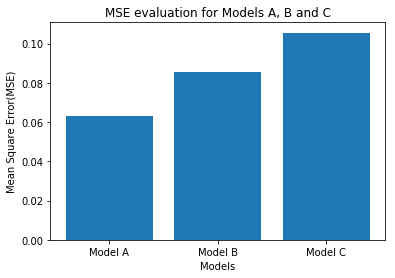

In [20]:
def MSE_comparison(mse_set):
    print('MSE values')
    print('A: ' + str(mse_set[0]), ', B: ' + str(mse_set[1]), ' , C: ' + str(mse_set[2]))
    plt.bar(['Model A', 'Model B', 'Model C'], mse_set)
    plt.xlabel('Models')
    plt.ylabel('Mean Square Error(MSE)')
    plt.title('MSE evaluation for Models A, B and C')
MSE_comparison(evaluate_models(training_set, test_set))

In [23]:
training_set

,Date,Months Past Since November 2014,Price,CPI,Unemployment Rate
0,Nov 14,0,2.2196,248.37,19.9
1,Dec 14,1,2.3345,248.82,20.2
2,Jan 15,2,2.4464,247.72,20.0
3,Feb 15,3,2.5088,250.45,20.0
4,Mar 15,4,2.5978,252.24,18.6
5,Apr 15,5,2.6723,255.23,17.0
6,May 15,6,2.6630,259.39,17.0
7,Jun 15,7,2.6816,260.85,17.7
8,Jul 15,8,2.7710,259.51,18.3
9,Aug 15,9,2.9148,259.74,18.3


In [24]:
test_set

,Date,Months Past Since November 2014,Price,CPI,Unemployment Rate
55,Jun 19,55,5.7921,413.63,24.8
56,Jul 19,56,5.5864,419.24,27.1
57,Aug 19,57,5.8306,422.84,27.4


In [25]:
outcomes.dtype

dtype('float64')